In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data = pd.read_csv("feature data/scaled.csv")
data.loc[data["0"] == 10, "0"] = 1
data

,0,Left Eye Width,Left Eye Height,Right Eye Width,Right Eye Height,Mouth Width,Mouth Height
0,0.0,0.742409,0.493463,0.661817,0.462014,0.482701,0.412251
1,0.0,0.668379,0.490166,0.503346,0.483860,0.410035,0.429143
2,0.0,0.650205,0.389691,0.418349,0.415047,0.364750,0.412448
3,0.0,0.612220,0.355901,0.566777,0.361683,0.472348,0.363379
4,0.0,0.628623,0.342765,0.449387,0.299543,0.370034,0.386689
...,...,...,...,...,...,...,...
2360,1.0,0.568112,0.352149,0.605900,0.277314,0.687712,0.238977
2361,1.0,0.530622,0.297908,0.643606,0.385011,0.243057,0.827651
2362,1.0,0.574214,0.392277,0.635752,0.377617,0.571493,0.445496
2363,1.0,0.503266,0.177953,0.625595,0.182423,0.561136,0.526585


In [3]:
X = data.iloc[:, [i for i in range(1, 7)]]
Y = data.iloc[:, 0]
X

,Left Eye Width,Left Eye Height,Right Eye Width,Right Eye Height,Mouth Width,Mouth Height
0,0.742409,0.493463,0.661817,0.462014,0.482701,0.412251
1,0.668379,0.490166,0.503346,0.483860,0.410035,0.429143
2,0.650205,0.389691,0.418349,0.415047,0.364750,0.412448
3,0.612220,0.355901,0.566777,0.361683,0.472348,0.363379
4,0.628623,0.342765,0.449387,0.299543,0.370034,0.386689
...,...,...,...,...,...,...
2360,0.568112,0.352149,0.605900,0.277314,0.687712,0.238977
2361,0.530622,0.297908,0.643606,0.385011,0.243057,0.827651
2362,0.574214,0.392277,0.635752,0.377617,0.571493,0.445496
2363,0.503266,0.177953,0.625595,0.182423,0.561136,0.526585


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
fold1, fold2, fold3, fold4, fold5 = 476, 971, 1449, 1919, 2365

def split_data(fold): # fold to test on
    if fold == 1:
        xtr, xte = X[fold1:], X[:fold1]
        ytr, yte = Y[fold1:], Y[:fold1]
    if fold == 2:
        xtr, xte = pd.concat([X[:fold1], X[fold2:]]), X[fold1:fold2]
        ytr, yte = pd.concat([Y[:fold1], Y[fold2:]]), Y[fold1:fold2]
    if fold == 3:
        xtr, xte = pd.concat([X[:fold2], X[fold3:]]), X[fold2:fold3]
        ytr, yte = pd.concat([Y[:fold2], Y[fold3:]]), Y[fold2:fold3]
    if fold == 4:
        xtr, xte = pd.concat([X[:fold3], X[fold4:]]), X[fold3:fold4]
        ytr, yte = pd.concat([Y[:fold3], Y[fold4:]]), Y[fold3:fold4]
    if fold == 5:
        xtr, xte = X[:fold4], X[fold4:]
        ytr, yte = Y[:fold4], Y[fold4:]
    return xtr, xte, ytr, yte

In [6]:
X_Train, X_Test, Y_Train, Y_Test = split_data(1)

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, input_shape=[6]),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(25, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                350       
_________________________________________________________________
dense_5 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 50)                200       
_________________________________________________________________
dense_6 (Dense)              (None, 25)                1275      
_________________________________________________________________
dropout_3 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [18]:
history = model.fit(X_Train, Y_Train, epochs=500, verbose=0, validation_data=(X_Test, Y_Test))

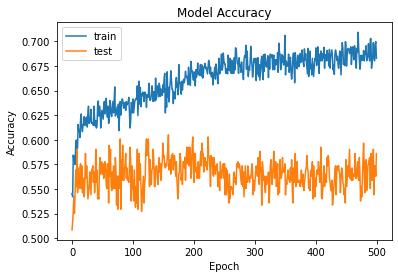

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("modelacc.png")
plt.show()

In [23]:
model.evaluate(X_Train, Y_Train)

60/60 [==============================] - 0s 2ms/step - loss: 0.5445 - accuracy: 0.7395


[0.544493556022644, 0.7395447492599487]

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
Y_Pred = np.argmax(model.predict(X_Test), axis=-1)
accuracy = accuracy_score(Y_Test, Y_Pred)
precision = precision_score(Y_Test, Y_Pred, pos_label=1)
recall = recall_score(Y_Test, Y_Pred, pos_label=1)
f1 = f1_score(Y_Test, Y_Pred, pos_label=1)
accuracy, precision, recall, f1

(0.5861344537815126,
 0.6376811594202898,
 0.37446808510638296,
 0.47184986595174266)